Task Details: Use scikit-learn to create a linear
regression model that predicts house prices based on
input features.

Dataset: Boston Housing Dataset (Note: This dataset is
deprecated, consider using alternatives like the
California housing dataset.)

In [3]:
from sklearn import datasets
import pandas as pd

In [4]:
[attr for attr in dir(datasets) if not attr.startswith('_')]

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll',
 'textwrap']

In [5]:
california = datasets.fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
california.target_names

['MedHouseVal']

In [10]:
print("Features:", california.data.shape, california.data.dtype)
print("Target:", california.target.shape, california.target.dtype)

Features: (20640, 8) float64
Target: (20640,) float64


In [11]:
# creating dataframe from data
df_c = pd.DataFrame(california.data, columns=california.feature_names)
df_c['Target'] = california.target
df_c.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df_c.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
x = california.data
y = california.target

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [17]:
x_train[0]

array([ 3.39260000e+00,  3.20000000e+01,  5.57543860e+00,  1.06374269e+00,
        4.95100000e+03,  2.89532164e+00,  3.86000000e+01, -1.21300000e+02])

In [18]:
y_train[0]

1.034

# Multiple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [20]:
c = lr.intercept_
c

-37.40589036485645

In [21]:
m = lr.coef_
m

array([ 4.40537102e-01,  9.65885049e-03, -1.04706185e-01,  6.26453465e-01,
       -4.62323582e-06, -3.37380630e-03, -4.24326847e-01, -4.39201951e-01])

In [22]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([1.34388384, 1.51813247, 2.55663007, ..., 1.14747371, 1.05275605,
       1.82225528])

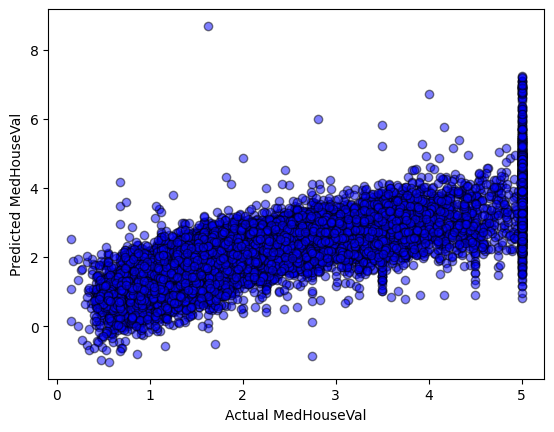

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, edgecolors='k')
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.show()

In [24]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.6102859678113064

In [25]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([2.12391852, 0.93825754, 2.7088455 , ..., 1.24263061, 2.73771901,
       1.75800594])

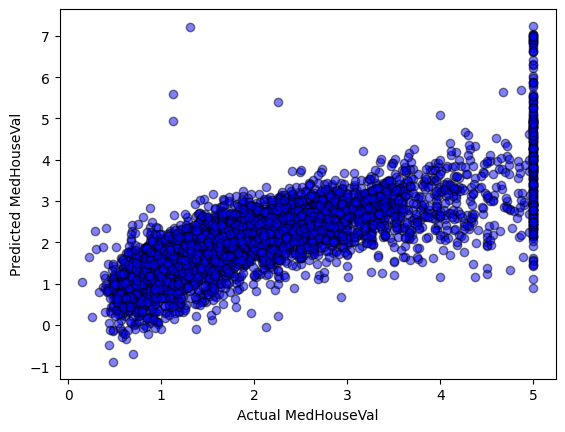

In [26]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5, edgecolor='k')
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.show()

In [27]:
r2_score(y_test, y_pred_test)

0.5929869285760032

In [28]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(lr,x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())


Cross-validated R^2 scores: [0.62915957 0.6136394  0.60641599 0.60386143 0.57508523]
Mean R^2 score: 0.6056323277793183


In [29]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(lr,x_test, y_test, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())


Cross-validated R^2 scores: [0.6077998  0.55813718 0.61340236 0.63216427 0.61078433]
Mean R^2 score: 0.6044575869547713


# Polynomial Linear Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

poly.fit(x_train_poly, y_train)
lin.fit(x_train_poly, y_train)



LinearRegression()

In [31]:
y_pred_train = lin.predict(x_train_poly)

from sklearn.metrics import mean_absolute_error, r2_score

print(f"MAE for training set:", mean_absolute_error(y_train, y_pred_train))
print(f"R2 SCORE for training set:", r2_score(y_train, y_pred_train))

MAE for training set: 0.45971433180700566
R2 SCORE for training set: 0.687333506416304


In [32]:
y_pred_test = lin.predict(x_test_poly)

from sklearn.metrics import mean_absolute_error, r2_score

print(f"MAE for testing set:", mean_absolute_error(y_test, y_pred_test))
print(f"R2 SCORE for testing set:", r2_score(y_test, y_pred_test))

MAE for testing set: 0.4635768732515857
R2 SCORE for testing set: 0.6632310620200768


## Using Regularization

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train_poly, y_train)
y_pred_train_ridge = ridge.predict(x_train_poly)
y_pred_test_ridge = ridge.predict(x_test_poly)

print(f"Ridge R^2 score on training set: {r2_score(y_train, y_pred_train_ridge)}")
print(f"Ridge R^2 score on test set: {r2_score(y_test, y_pred_test_ridge)}")

Ridge R^2 score on training set: 0.6841903894347912
Ridge R^2 score on test set: 0.6621117211636934


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.83302e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(x_train_poly, y_train)
y_pred_train_ridge = ridge.predict(x_train_poly)
y_pred_test_ridge = ridge.predict(x_test_poly)

print(f"Ridge R^2 score on training set: {r2_score(y_train, y_pred_train_ridge)}")
print(f"Ridge R^2 score on test set: {r2_score(y_test, y_pred_test_ridge)}")

Ridge R^2 score on training set: 0.6769836490735286
Ridge R^2 score on test set: 0.6601864420946076


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.60462e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Hyperparameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha':[1.0,0.5,1,10]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_poly,y_train)

print("Best parameters found ", grid_search.best_params_)
print("Best cross validated r2 score: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.046e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.352e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.13003e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.09451e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: I

Best parameters found  {'alpha': 10}
Best cross validated r2 score:  0.2273428985015557


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.352e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.13003e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.09451e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.23627e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: